In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/German-TrafficSigns-Classification-CNN
!ls

/content/drive/MyDrive/German-TrafficSigns-Classification-CNN
30kmh.png		    ModelTraning-Adversarial-attacks.ipynb  test.p
model_conv_after_attack.h5  requirements.txt			    train.p
model_conv_no_OH.h5	    signnames.csv			    valid.p


In [ ]:
import pickle
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# Load data
training_file = "train.p"
testing_file = "test.p"
validation_file = "valid.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

# Normalize data
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# # One-hot encode labels
n_classes = len(set(y_train))
# y_train = to_categorical(y_train, n_classes)
# y_valid = to_categorical(y_valid, n_classes)
# y_test = to_categorical(y_test, n_classes)


In [ ]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [ ]:
labelNames = open("signnames.csv").read().strip().split("\n")[1:]
labelNames

['0,Speed limit (20km/h)',
 '1,Speed limit (30km/h)',
 '2,Speed limit (50km/h)',
 '3,Speed limit (60km/h)',
 '4,Speed limit (70km/h)',
 '5,Speed limit (80km/h)',
 '6,End of speed limit (80km/h)',
 '7,Speed limit (100km/h)',
 '8,Speed limit (120km/h)',
 '9,No passing',
 '10,No passing for vehicles over 3.5 metric tons',
 '11,Right-of-way at the next intersection',
 '12,Priority road',
 '13,Yield',
 '14,Stop',
 '15,No vehicles',
 '16,Vehicles over 3.5 metric tons prohibited',
 '17,No entry',
 '18,General caution',
 '19,Dangerous curve to the left',
 '20,Dangerous curve to the right',
 '21,Double curve',
 '22,Bumpy road',
 '23,Slippery road',
 '24,Road narrows on the right',
 '25,Road work',
 '26,Traffic signals',
 '27,Pedestrians',
 '28,Children crossing',
 '29,Bicycles crossing',
 '30,Beware of ice/snow',
 '31,Wild animals crossing',
 '32,End of all speed and passing limits',
 '33,Turn right ahead',
 '34,Turn left ahead',
 '35,Ahead only',
 '36,Go straight or right',
 '37,Go straight or

In [ ]:
# Define the model
model_conv = Sequential()
model_conv.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), padding='same'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D((2, 2), padding='same'))
model_conv.add(Conv2D(64, (3, 3), padding='same'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_conv.add(Conv2D(128, (3, 3), padding='same'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model_conv.add(Flatten())
model_conv.add(Dense(128))
model_conv.add(Activation('relu'))
model_conv.add(Dense(n_classes, activation='softmax'))

In [ ]:
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

In [ ]:
from keras.losses import SparseCategoricalCrossentropy

model_conv.compile(optimizer='adam',
                   loss=SparseCategoricalCrossentropy(),
                   metrics=['accuracy'])

In [ ]:
# Train the model
model_conv.fit(X_train, y_train, batch_size=64, epochs=15, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/15
544/544 [==============================] - 80s 145ms/step - loss: 1.4754 - accuracy: 0.5874 - val_loss: 1.0461 - val_accuracy: 0.7152
Epoch 2/15
544/544 [==============================] - 77s 142ms/step - loss: 0.2008 - accuracy: 0.9431 - val_loss: 0.7027 - val_accuracy: 0.8535
Epoch 3/15
544/544 [==============================] - 75s 138ms/step - loss: 0.0823 - accuracy: 0.9772 - val_loss: 0.6825 - val_accuracy: 0.8567
Epoch 4/15
544/544 [==============================] - 77s 141ms/step - loss: 0.0488 - accuracy: 0.9864 - val_loss: 0.6732 - val_accuracy: 0.8646
Epoch 5/15
544/544 [==============================] - 83s 153ms/step - loss: 0.0326 - accuracy: 0.9911 - val_loss: 0.5877 - val_accuracy: 0.9023
Epoch 6/15
544/544 [==============================] - 80s 146ms/step - loss: 0.0213 - accuracy: 0.9941 - val_loss: 0.5623 - val_accuracy: 0.8927
Epoch 7/15
544/544 [==============================] - 80s 148ms/step - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.4633 - val_ac

In [ ]:
# Save the model
model_conv.save("model_conv_no_OH.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load the trained model
from keras.models import load_model

model = load_model("model_conv_no_OH.h5")

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test,verbose=0)


print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Test Loss: 0.5271782279014587
Test Accuracy: 0.9323832392692566


In [ ]:
y_test[3002]

1

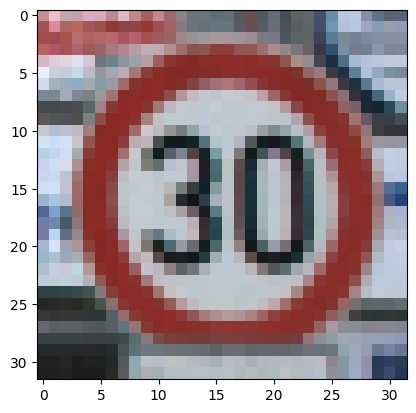

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[3002])

In [ ]:

# Select the test image
test_image = X_test[3002]

# Reshape the image to match the model input shape
test_image = np.expand_dims(test_image, axis=0)

# Get the model's predictions for the test image
predictions = model.predict(test_image)

# Get the top 5 predicted labels and their confidence scores
top_5_indices = np.argsort(predictions[0])[-5:][::-1]
top_5_labels = top_5_indices
top_5_confidences = [predictions[0][i] for i in top_5_indices]

# Print the top 5 labels and their confidence scores
for label, confidence in zip(top_5_labels, top_5_confidences):
    print(f"Label: {label}, Confidence: {confidence}")


1/1 [==============================] - 0s 92ms/step
Label: 1, Confidence: 1.0
Label: 0, Confidence: 1.6512509675575826e-12
Label: 28, Confidence: 3.295032611074358e-17
Label: 2, Confidence: 1.751157108749315e-21
Label: 5, Confidence: 3.7144456044530364e-22


In [ ]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

395/395 [==============================] - 10s 24ms/step


Found 11844 correct labels


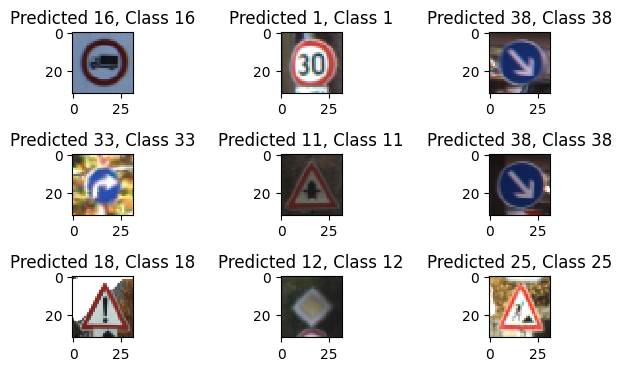

In [ ]:
# Show correctly classified traffic signs
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[correct].reshape(32,32,-1), interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 786 incorrect labels


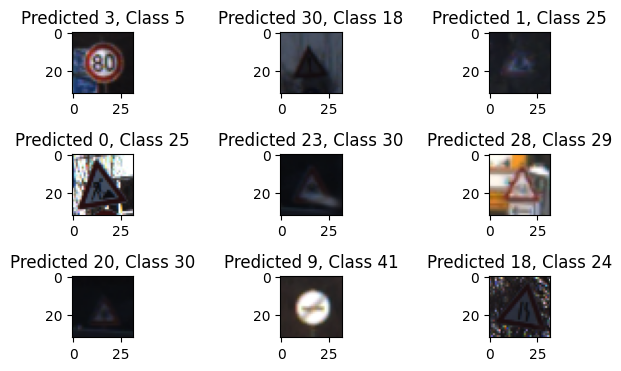

In [ ]:

# Show incorrectly classified traffic signs
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(4,3,i+1)
    plt.imshow(X_test[incorrect].reshape(32,32,-1))
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [ ]:
incorrect_indices = np.where(predicted_classes != y_test)[0]
incorrect_indices

array([   30,    48,    50,   107,   114,   117,   127,   147,   151,
         163,   197,   198,   237,   243,   246,   252,   265,   280,
         287,   304,   305,   309,   335,   339,   403,   421,   427,
         455,   461,   477,   478,   492,   496,   501,   502,   537,
         550,   567,   579,   586,   624,   637,   660,   661,   675,
         677,   734,   749,   778,   780,   804,   820,   829,   859,
         899,   914,   939,   982,   988,   990,   995,  1034,  1061,
        1079,  1136,  1183,  1200,  1204,  1210,  1234,  1268,  1276,
        1280,  1317,  1352,  1364,  1384,  1385,  1390,  1402,  1431,
        1475,  1477,  1489,  1524,  1559,  1573,  1583,  1628,  1660,
        1671,  1697,  1709,  1734,  1753,  1759,  1763,  1773,  1782,
        1802,  1817,  1819,  1851,  1853,  1865,  1898,  1907,  1910,
        1947,  1957,  1966,  2002,  2017,  2025,  2052,  2057,  2065,
        2069,  2087,  2098,  2102,  2109,  2112,  2157,  2176,  2191,
        2258,  2295,

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
from keras.losses import SparseCategoricalCrossentropy

# Load the test data
testing_file = "test.p"
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_test, y_test = test['features'], test['labels']

# Normalize data
X_test = X_test.astype('float32') / 255

# Define epsilon for FGSM attack
epsilon = 0.2

# Select the test image
test_image = X_test[3002]

# Reshape the image to match the model input shape
test_image = tf.convert_to_tensor(np.expand_dims(test_image, axis=0))

# Load the trained model
model = load_model("model_conv_no_OH.h5")

# Get the model's predictions for the test image
predictions = model(test_image)

# Get the label for the test image
label = tf.convert_to_tensor(y_test[3002])

# Compute the loss
loss = SparseCategoricalCrossentropy()(label, predictions)

# Compute gradients of the loss with respect to the input image
with tf.GradientTape() as tape:
    tape.watch(test_image)
    predictions = model(test_image)
    loss = SparseCategoricalCrossentropy()(label, predictions)

# Get the gradients
gradients_value = tape.gradient(loss, test_image)

# Ensure gradients are not None
if gradients_value is not None:
    # Calculate the sign of the gradients
    signed_grad = tf.sign(gradients_value)

    # Create the perturbed image
    perturbed_image = test_image + epsilon * signed_grad

    # Clip the perturbed image to ensure it's in the valid range
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)

    # Get the model's predictions for the perturbed image
    predictions_perturbed = model(perturbed_image)

    # Get the top 5 predicted labels and their confidence scores for the perturbed image
    top_5_indices_perturbed = np.argsort(predictions_perturbed[0])[-5:][::-1]
    top_5_labels_perturbed = top_5_indices_perturbed
    top_5_confidences_perturbed = [predictions_perturbed[0][i] for i in top_5_indices_perturbed]

    # Print the top 5 labels and their confidence scores for the perturbed image
    for label, confidence in zip(top_5_labels_perturbed, top_5_confidences_perturbed):
        print(f"Label: {label}, Confidence: {confidence}")
else:
    print("Gradients are None. Unable to perform the attack.")


Label: 0, Confidence: 1.0
Label: 1, Confidence: 1.44322105764618e-17
Label: 4, Confidence: 4.338511570842016e-26
Label: 8, Confidence: 1.3168890092486688e-38
Label: 11, Confidence: 0.0


In [ ]:
perturbed_image_np = perturbed_image.numpy()

# Plot the original and perturbed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.squeeze(test_image), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(perturbed_image_np), cmap='gray')
plt.title('Perturbed Image')
plt.axis('off')

plt.show()

In [ ]:

from skimage.transform import resize

model = load_model("model_conv_no_OH.h5")

# Select the test image
test_image = X_test[3002]

# Define patch sizes
patch_sizes = [4, 48, 128, 512 ]

# Define epsilon for the patch attack
epsilon = 0.1

# Iterate over each patch size
for patch_size in patch_sizes:
    # Create a white patch image
    patch_image = np.ones((patch_size, patch_size, 3), dtype=np.float32)

    # Resize the patch image to match the patch size
    patch_image_resized = resize(patch_image, (test_image.shape[0], test_image.shape[1]))

    # Overlay the patch on the test image
    perturbed_image = np.copy(test_image)
    perturbed_image[:patch_size, :patch_size, :] = patch_image_resized[:patch_size, :patch_size, :]

    # Reshape the perturbed image to match the model input shape
    perturbed_image = tf.convert_to_tensor(np.expand_dims(perturbed_image, axis=0))

    # Get the model's predictions for the perturbed image
    predictions = model(perturbed_image)

    # Get the top 5 predicted labels and their confidence scores for the perturbed image
    top_5_indices = np.argsort(predictions[0])[-5:][::-1]
    top_5_labels = top_5_indices
    top_5_confidences = [predictions[0][i] for i in top_5_indices]

    # Print the top 5 labels and their confidence scores for the perturbed image
    print(f"Patch Size: {patch_size}x{patch_size}")
    for label, confidence in zip(top_5_labels, top_5_confidences):
        print(f"Label: {label}, Confidence: {confidence}")


Patch Size: 4x4
Label: 1, Confidence: 1.0
Label: 0, Confidence: 1.3861711258000842e-12
Label: 28, Confidence: 5.2563360769527104e-17
Label: 2, Confidence: 1.002422238250207e-21
Label: 5, Confidence: 3.883213370556316e-22
Patch Size: 48x48
Label: 2, Confidence: 0.9329168200492859
Label: 11, Confidence: 0.04406244680285454
Label: 3, Confidence: 0.021585164591670036
Label: 5, Confidence: 0.0010762539459392428
Label: 4, Confidence: 0.0002005384158110246
Patch Size: 128x128
Label: 2, Confidence: 0.9329168200492859
Label: 11, Confidence: 0.04406244680285454
Label: 3, Confidence: 0.021585164591670036
Label: 5, Confidence: 0.0010762539459392428
Label: 4, Confidence: 0.0002005384158110246
Patch Size: 512x512
Label: 2, Confidence: 0.9329168200492859
Label: 11, Confidence: 0.04406244680285454
Label: 3, Confidence: 0.021585164591670036
Label: 5, Confidence: 0.0010762539459392428
Label: 4, Confidence: 0.0002005384158110246
